# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Loading the Dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'imdb-dataset-of-50k-movie-reviews' dataset.
Path to dataset files: /kaggle/input/imdb-dataset-of-50k-movie-reviews


# Read the Dataset

In [ ]:
import os
data = df = pd.read_csv(os.path.join(path, "IMDB Dataset.csv"))

# Display top 5 records

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Display last 5 records

In [ ]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


# Display all the Datatypes

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49582 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49582 non-null  object
 1   sentiment  49582 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


# 5 Points Summary Data

In [ ]:
data.describe()

,review,sentiment
count,49582,49582
unique,49582,2
top,No one expects the Star Trek movies to be high...,positive
freq,1,24884


# To check the null values

In [ ]:
data.isnull().sum()

,0
review,0
sentiment,0


# To check the duplicate values

In [ ]:
data.duplicated().sum()

np.int64(418)

# Drop null values

In [ ]:
data.drop_duplicates(inplace=True)

# Value Count

In [ ]:
data['sentiment'].value_counts()

,count
sentiment,
positive,24884
negative,24698


In [ ]:
data['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

# Remove Tags

In [ ]:
import re
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'),' ', raw_text)
    return cleaned_text

In [ ]:
data['sentiment'] = data['sentiment'].apply(remove_tags)

# Convert all text in the 'Sentiment' Columns to lowercase

In [ ]:
data['sentiment'] = data['sentiment'].apply(lambda x:x.lower())

# Load the list of satndard English stopwords

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw_list = stopwords.words('english')
data['sentiment'] = data['sentiment'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x: " ".join(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


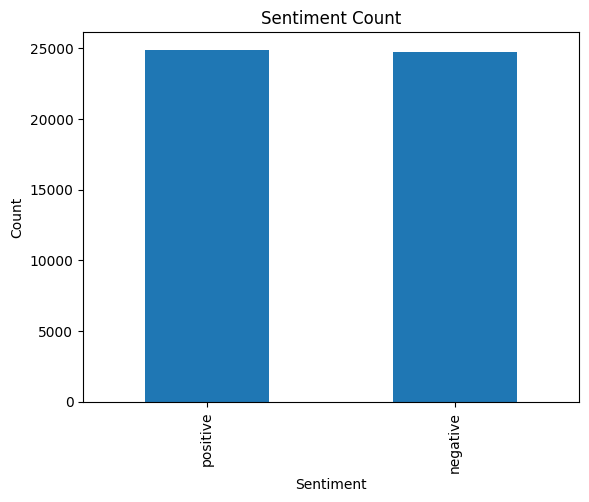

In [ ]:
data['sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Count')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Define X,y and perform train_test_split

In [ ]:
X = data['review']
y = data['sentiment']

# Model Training and Testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training Data Shape', X_train.shape)
print('Testing Data Shape', X_test.shape)

Training Data Shape (39665,)
Testing Data Shape (9917,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectorized = tfidf_vectorizer.fit_transform(X_train)
X_test_vectorized = tfidf_vectorizer.transform(X_test)
print("Shape of X_train_vectorized:", X_train_vectorized.shape)
print("Shape of X_test_vectorized:", X_test_vectorized.shape)

Shape of X_train_vectorized: (39665, 5000)
Shape of X_test_vectorized: (9917, 5000)


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# Creating Model

In [ ]:
lr.fit(X_train_vectorized, y_train)

LogisticRegression()

# Create a predction set and print a confussion matrix

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
predictions = lr.predict(X_test_vectorized)
print(metrics.confusion_matrix(y_test, predictions))

[[4327  612]
 [ 488 4490]]


# Print a classification Report

In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      4939
    positive       0.88      0.90      0.89      4978

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917

